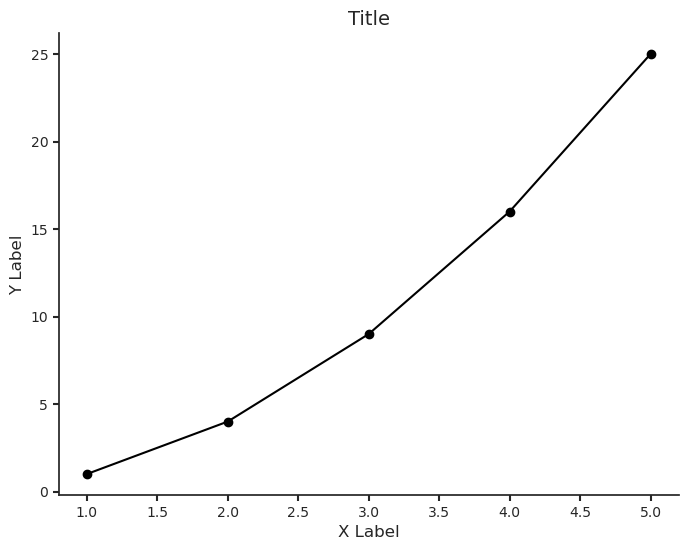

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")

# 数据
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

# 创建图形
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

# 绘制折线图
ax.plot(x, y, color='black', linewidth=1.5, marker='o', markersize=6)

# 设置坐标轴标签和标题
ax.set_xlabel('X Label', fontsize=12)
ax.set_ylabel('Y Label', fontsize=12)
ax.set_title('Title', fontsize=14)

# 设置坐标轴刻度线的样式
ax.tick_params(axis='both', which='major', labelsize=10, width=1.5, length=4)
ax.tick_params(axis='both', which='minor', labelsize=8, width=1, length=3)

# 隐藏上方和右侧的坐标轴线
sns.despine()

# 显示图形
plt.show()

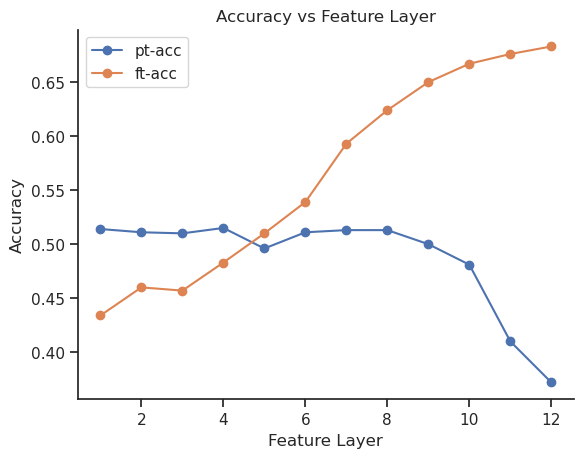

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 创建一个 DataFrame
df = pd.DataFrame({
    'feature_layer': [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
    'pt-acc': [0.372, 0.410, 0.481, 0.500, 0.513, 0.513, 0.511, 0.496, 0.515, 0.510, 0.511, 0.514],
    'ft-acc': [0.683, 0.676, 0.667, 0.650, 0.624, 0.593, 0.539, 0.510, 0.483, 0.457, 0.460, 0.434]
})

# 创建一个新的 figure
fig, ax = plt.subplots()

# 绘制折线图
ax.plot(df['feature_layer'], df['pt-acc'], marker='o', label='pt-acc')
ax.plot(df['feature_layer'], df['ft-acc'], marker='o', label='ft-acc')

# 添加标题和标签
ax.set_title('Accuracy vs Feature Layer')
ax.set_xlabel('Feature Layer')
ax.set_ylabel('Accuracy')
ax.legend()

# 去除上边和右边的边界轴
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 显示图形
plt.show()

## 设置stockCode

In [12]:
stockCode = 'SH600160'

## 获取数据

In [13]:
import akshare as ak


balancSheet_df = ak.stock_balance_sheet_by_yearly_em(symbol=stockCode)
incomeStatement_df = ak.stock_profit_sheet_by_yearly_em(symbol=stockCode)
cashFlowSheet_df = ak.stock_cash_flow_sheet_by_yearly_em(symbol=stockCode)

balancSheet_df = balancSheet_df.fillna(0)
incomeStatement_df = incomeStatement_df.fillna(0)
cashFlowSheet_df = cashFlowSheet_df.fillna(0)
balancSheet_df['REPORT_DATE_NAME'] = balancSheet_df['REPORT_DATE_NAME'].str[:4]
incomeStatement_df['REPORT_DATE_NAME'] = incomeStatement_df['REPORT_DATE_NAME'].str[:4]
cashFlowSheet_df['REPORT_DATE_NAME'] = cashFlowSheet_df['REPORT_DATE_NAME'].str[:4]

In [14]:
stock_individual_info_em_df = ak.stock_individual_info_em(symbol=stockCode[2:])
stockName = stock_individual_info_em_df['value'][5]

## 三支柱两搅局及核心利润获现率
  * 核心利润
  * 投资收益
  * 其他收益（政府补贴）

In [15]:
incomeStatement_df['GPM'] = (incomeStatement_df['OPERATE_INCOME'] - incomeStatement_df['OPERATE_COST'])/incomeStatement_df['OPERATE_INCOME']
incomeStatement_df['coreIncome'] = incomeStatement_df['OPERATE_INCOME'] - incomeStatement_df['OPERATE_COST']\
                 - incomeStatement_df['OPERATE_TAX_ADD'] - incomeStatement_df['RESEARCH_EXPENSE']\
                 - incomeStatement_df['MANAGE_EXPENSE'] - incomeStatement_df['SALE_EXPENSE']\
                 - incomeStatement_df['FE_INTEREST_INCOME']

incomeStatement_df['coreGPM'] = incomeStatement_df['coreIncome']/incomeStatement_df['OPERATE_INCOME']
incomeStatement_df['investmentIncome'] = incomeStatement_df['FE_INTEREST_INCOME'] + incomeStatement_df['INVEST_INCOME'] + incomeStatement_df['FAIRVALUE_CHANGE_INCOME']
incomeStatement_df['twoLoss'] = incomeStatement_df['CREDIT_IMPAIRMENT_INCOME'] + incomeStatement_df['ASSET_IMPAIRMENT_INCOME']
coreIncomeRate_df = incomeStatement_df[['REPORT_DATE_NAME', 'coreIncome','investmentIncome','OTHER_INCOME','twoLoss']]
operateAndRate_df = incomeStatement_df[['REPORT_DATE_NAME', 'OPERATE_INCOME','GPM','coreGPM']]

/tmp/ipykernel_1112/3085484584.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  incomeStatement_df['GPM'] = (incomeStatement_df['OPERATE_INCOME'] - incomeStatement_df['OPERATE_COST'])/incomeStatement_df['OPERATE_INCOME']
/tmp/ipykernel_1112/3085484584.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  incomeStatement_df['coreIncome'] = incomeStatement_df['OPERATE_INCOME'] - incomeStatement_df['OPERATE_COST']\
/tmp/ipykernel_1112/3085484584.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

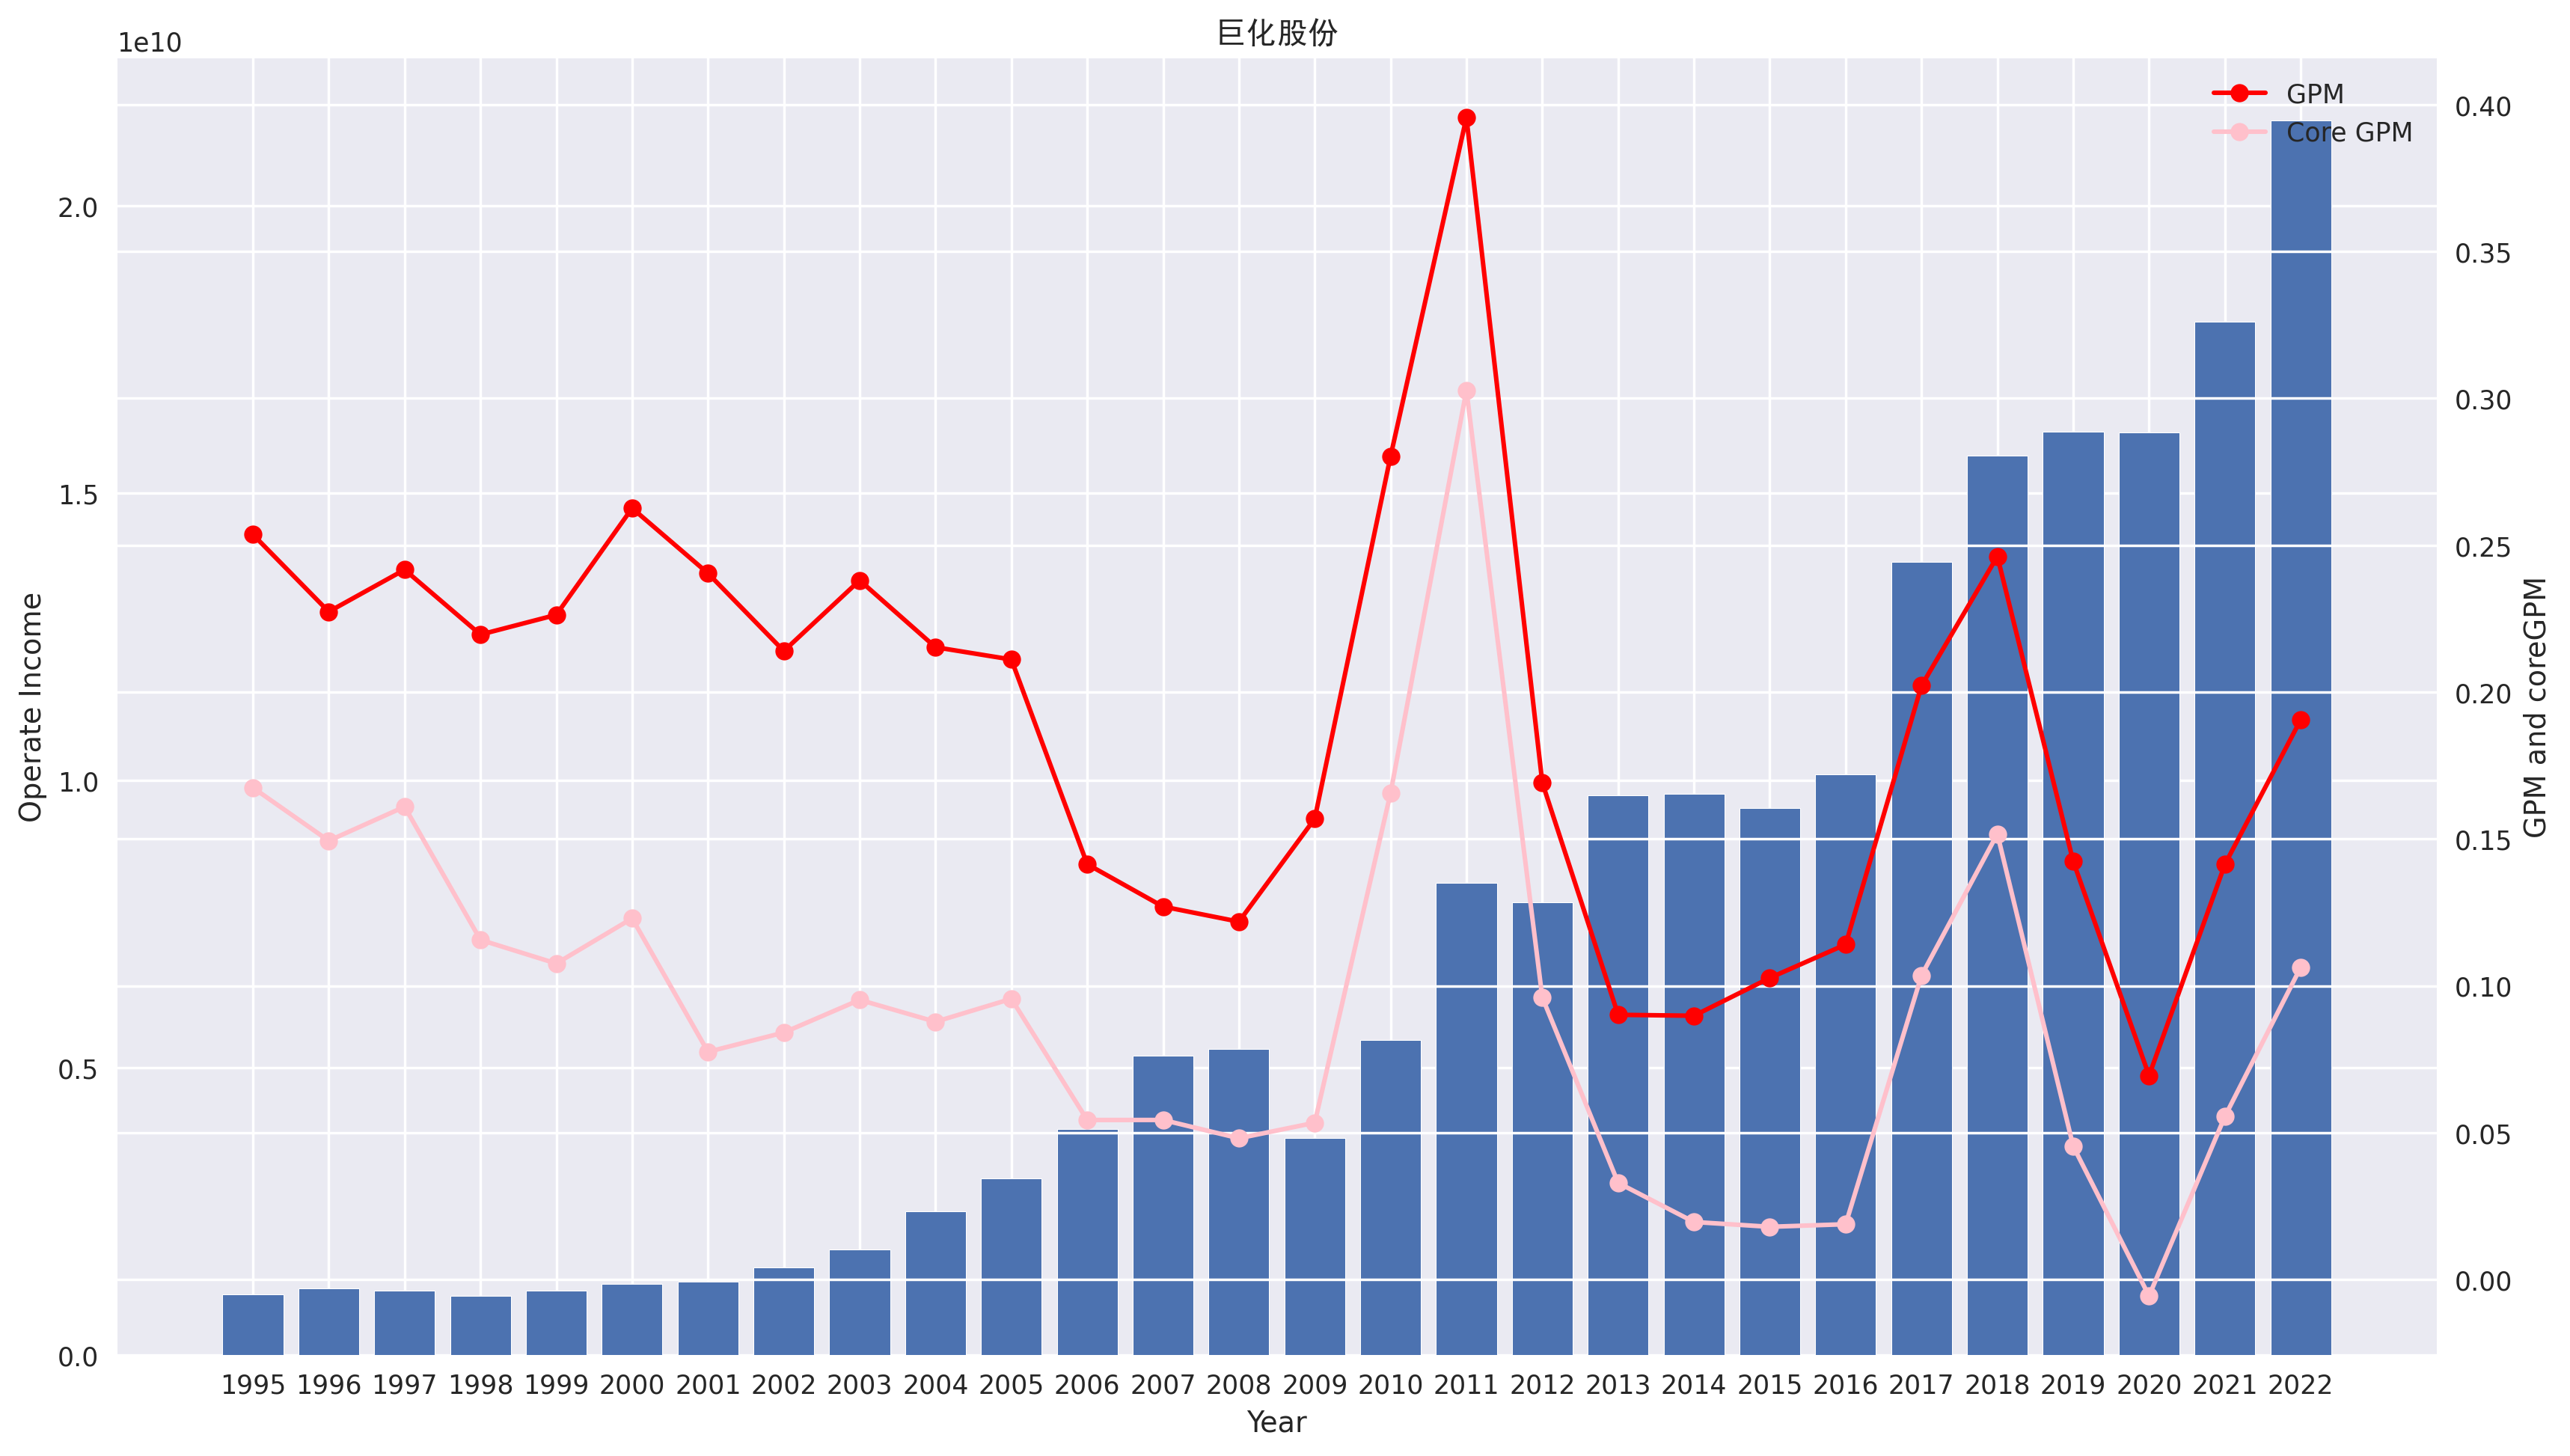

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
import seaborn as sns

# 获取调色板
sns.color_palette("rocket")
plt.style.use('seaborn')
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib.font_manager')
zhfont = matplotlib.font_manager.FontProperties(fname='/usr/share/fonts/truetype/SimHei.ttf')
plt.rcParams['axes.unicode_minus'] = False

operateAndRate_df = operateAndRate_df.sort_values('REPORT_DATE_NAME')
operateIncome_df = operateAndRate_df['OPERATE_INCOME']
GPM_df = operateAndRate_df['GPM']
coreGPM_df = operateAndRate_df['coreGPM']

years = operateAndRate_df['REPORT_DATE_NAME']
operate_income = operateAndRate_df['OPERATE_INCOME']

fig, ax1 = plt.subplots(dpi=250, figsize=(16, 9))
# 绘制柱状图
ax1.bar(years, operate_income)
ax1.set_xlabel('Year')
ax1.set_ylabel('Operate Income')

# 绘制折线图
ax2 = ax1.twinx()

# 绘制折线图
ax2.plot(years, GPM_df, marker='o', linestyle='-', label='GPM', color = 'red')
ax2.plot(years, coreGPM_df, marker='o', linestyle='-', label='Core GPM', color = 'pink')
ax2.set_ylabel('GPM and coreGPM')

# 添加图例
ax2.legend()


plt.legend()
plt.title(stockName, fontproperties=zhfont)
plt.savefig(stockName + '营收.png')
plt.show()


两搅局
  * 资产减值损失和信用减值损失带来的影响

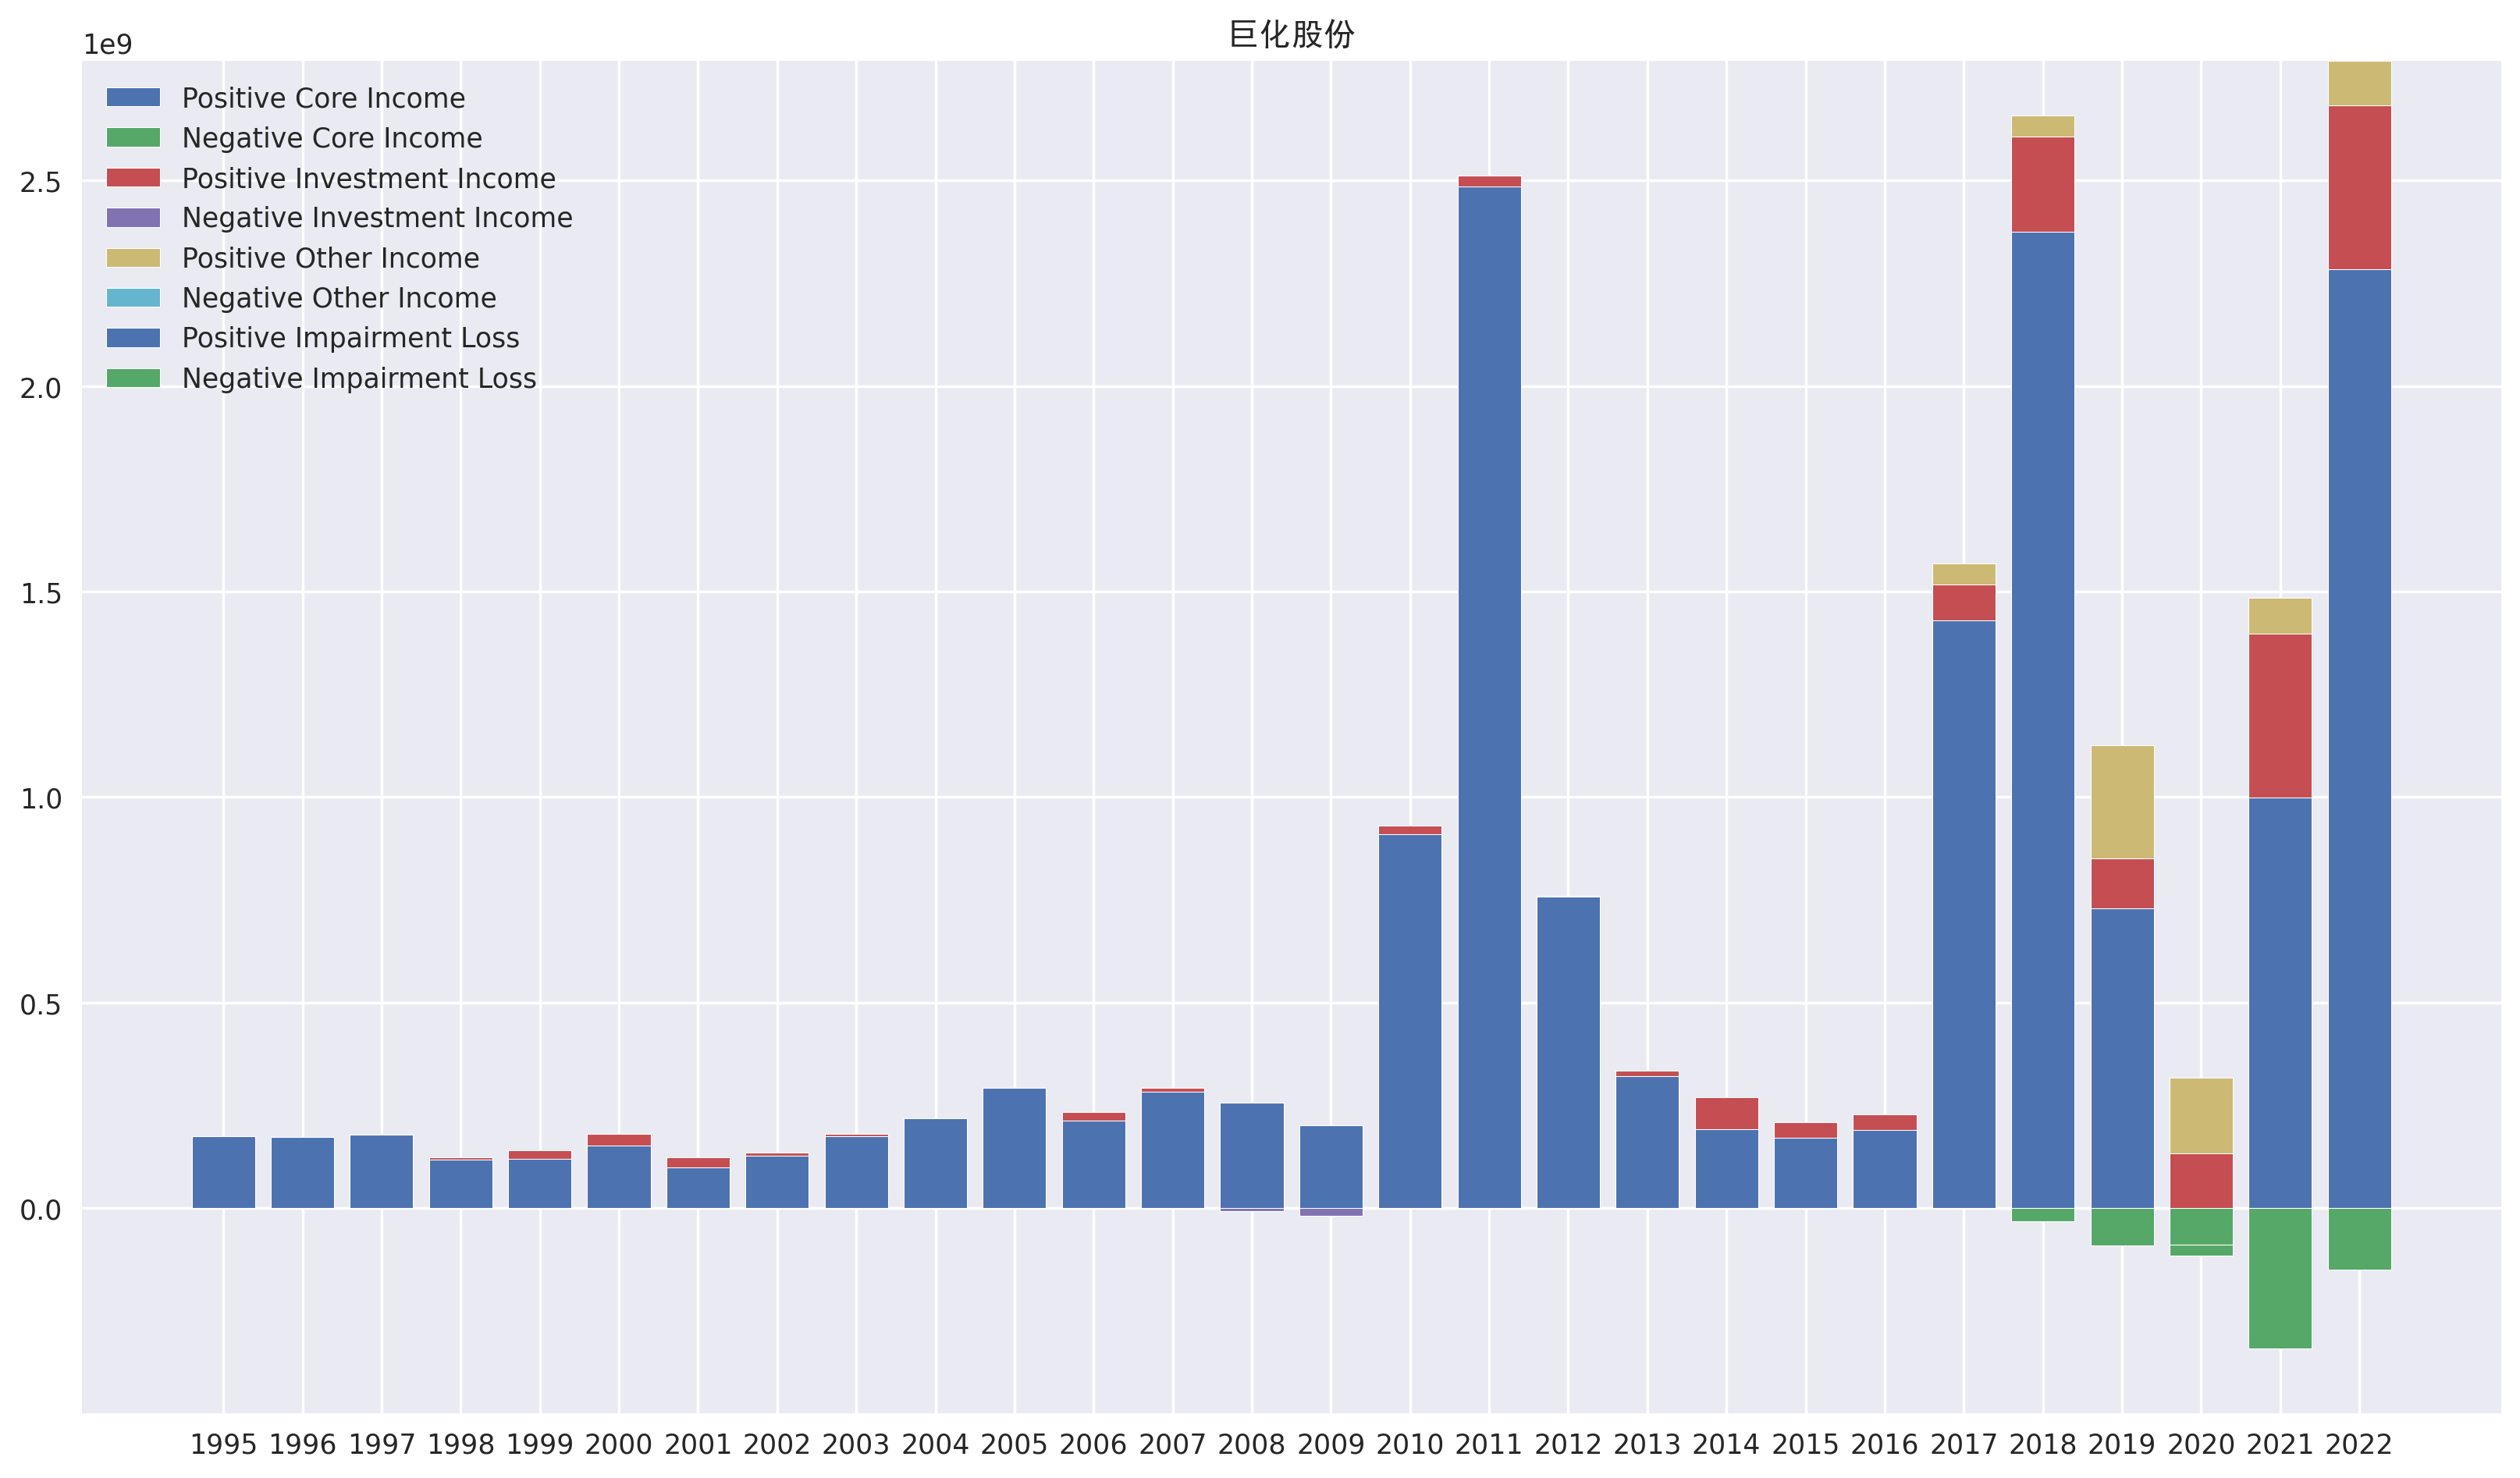

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
import seaborn as sns

# 获取调色板
sns.color_palette("rocket")
plt.style.use('seaborn')
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib.font_manager')
zhfont = matplotlib.font_manager.FontProperties(fname='/usr/share/fonts/truetype/SimHei.ttf')
plt.rcParams['axes.unicode_minus'] = False

coreIncomeRate_df = coreIncomeRate_df.sort_values('REPORT_DATE_NAME')
core_income = coreIncomeRate_df['coreIncome']
investment_income = coreIncomeRate_df['investmentIncome']
other_income = coreIncomeRate_df['OTHER_INCOME']
two_loss = coreIncomeRate_df['twoLoss']

plt.figure(dpi=250, figsize=(16, 9))

positive_core_income = np.where(core_income>0, core_income, 0)
negative_core_income = np.where(core_income<0, core_income, 0)

positive_investment_income = np.where(investment_income>0, investment_income, 0)
negative_investment_income = np.where(investment_income<0, investment_income, 0)

positive_other_income = np.where(other_income>0, other_income, 0)
negative_other_income = np.where(other_income<0, other_income, 0)

positive_two_loss = np.where(two_loss>0, two_loss, 0)
negative_two_loss = np.where(two_loss<0, two_loss, 0)
# 创建柱状图
plt.bar(coreIncomeRate_df['REPORT_DATE_NAME'], positive_core_income, label='Positive Core Income')
plt.bar(coreIncomeRate_df['REPORT_DATE_NAME'], negative_core_income, label='Negative Core Income')

plt.bar(coreIncomeRate_df['REPORT_DATE_NAME'], positive_investment_income, bottom=positive_core_income, label='Positive Investment Income')
plt.bar(coreIncomeRate_df['REPORT_DATE_NAME'], negative_investment_income, bottom=negative_core_income, label='Negative Investment Income')

plt.bar(coreIncomeRate_df['REPORT_DATE_NAME'], positive_other_income, bottom=positive_core_income+positive_investment_income, label='Positive Other Income')
plt.bar(coreIncomeRate_df['REPORT_DATE_NAME'], negative_other_income, bottom=negative_core_income+negative_investment_income, label='Negative Other Income')

plt.bar(coreIncomeRate_df['REPORT_DATE_NAME'], positive_two_loss, bottom=positive_core_income+positive_investment_income+positive_other_income, label='Positive Impairment Loss')
plt.bar(coreIncomeRate_df['REPORT_DATE_NAME'], negative_two_loss, bottom=negative_core_income+negative_investment_income+negative_other_income, label='Negative Impairment Loss')

plt.legend()
plt.title(stockName, fontproperties=zhfont)
plt.savefig(stockName + '.png')
plt.show()



In [18]:
coreIncome_df = incomeStatement_df[['REPORT_DATE_NAME', 'coreIncome']]
netCashOperate_df = cashFlowSheet_df[['REPORT_DATE_NAME','NETCASH_OPERATE']]
merged_df = coreIncome_df.merge(netCashOperate_df, on='REPORT_DATE_NAME')

merged_df['CoreProfitRealizationRate'] = merged_df['NETCASH_OPERATE']/merged_df['coreIncome']
print(merged_df)

   REPORT_DATE_NAME    coreIncome  NETCASH_OPERATE  CoreProfitRealizationRate
0              2022  2.284465e+09     3.316622e+09                   1.451816
1              2021  9.985886e+08     1.247331e+09                   1.249094
2              2020 -8.960166e+07     9.886893e+08                 -11.034275
3              2019  7.292960e+08     1.882399e+09                   2.581118
4              2018  2.375313e+09     3.189976e+09                   1.342971
5              2017  1.429272e+09     9.437072e+08                   0.660271
6              2016  1.902121e+08     9.216790e+08                   4.845533
7              2015  1.708562e+08     7.923496e+08                   4.637523
8              2014  1.913188e+08     6.221654e+08                   3.251982
9              2013  3.204925e+08     7.944215e+08                   2.478752
10             2012  7.571048e+08     9.319754e+07                   0.123097
11             2011  2.486045e+09     2.781499e+09              

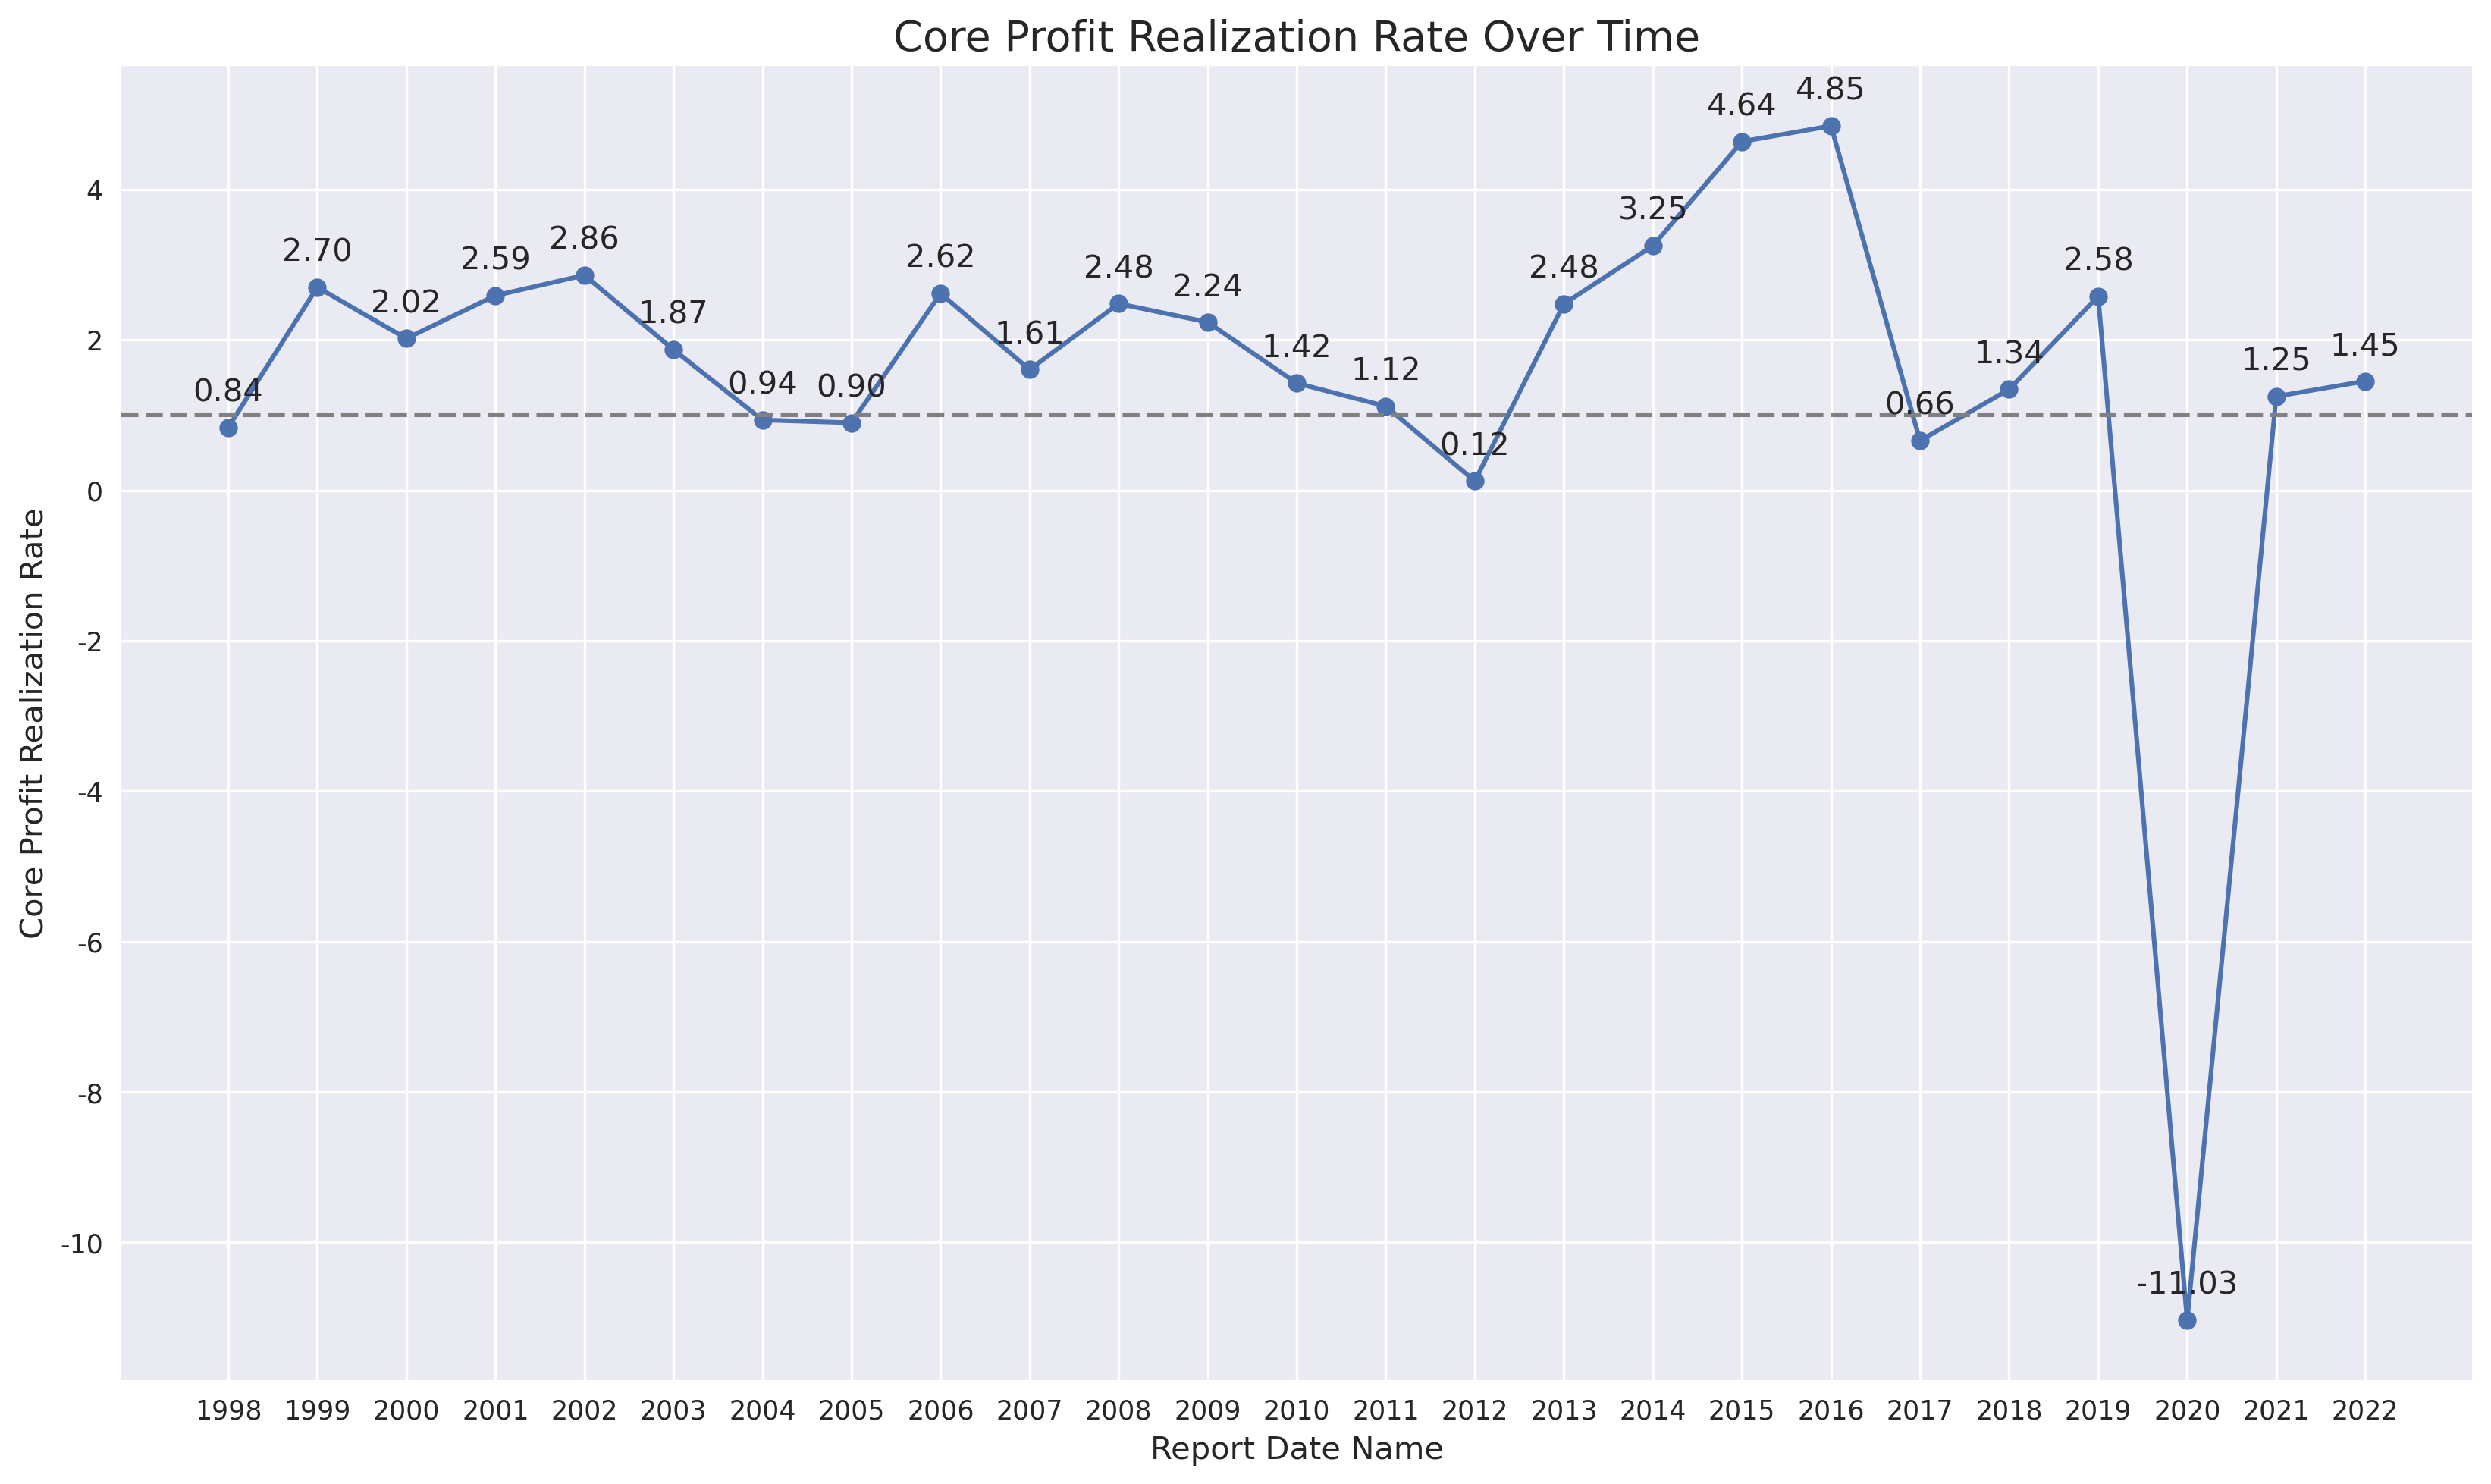

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 获取调色板
sns.color_palette("rocket")
plt.style.use('seaborn')
merged_df = merged_df.sort_values('REPORT_DATE_NAME')
# 数据
report_date_name = merged_df['REPORT_DATE_NAME']
core_profit_realization_rate = merged_df['CoreProfitRealizationRate']

# 绘制折线图
plt.figure(dpi=250, figsize=(16, 9))
plt.plot(report_date_name, core_profit_realization_rate, marker='o')

# 标注具体数值
for i in range(len(report_date_name)):
    plt.annotate(f'{core_profit_realization_rate[i]:.2f}', (report_date_name[i], core_profit_realization_rate[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.axhline(1, color='gray', linestyle='dashed')
# 设置标题和坐标轴标签
plt.title("Core Profit Realization Rate Over Time", fontsize=16)
plt.xlabel("Report Date Name", fontsize=12)
plt.ylabel("Core Profit Realization Rate", fontsize=12)

plt.savefig(stockName + '获现率.png')
# 显示图形
plt.show()


## 企业战略及资产结构
  * 卖什么（产品）
  * 卖给谁（客户）
  * 效益如何（毛利率 产品市场竞争力）
### 经营资产和投资资产的结构分析
  * *经营性资产* 主要包括货币资金、商业债权、存货、固定资产和无形资产等，是指企业在自身经营活动中所动用的各项资产。
关于现金（包括银行存款在内）是否属于经营性资产在理论界尚存争议，一种观点认为现金 处于闲置状态，不应将其视为经营性资产。
但本书认为现金是经营性资产在经营周转过程中一个必不可少的环节和存在形态，且其利息收入通常作为企业财务费用的减项，构成企业自身经营活动所取得成果（即本书所称的核心利润）的一部分，
因此为简便起见，将其列入经营性资产项目。

  * *投资性资产*也被有些学者称为金融资产，但由于金融资产通常还包括现金和应收款项，它们并不属于 本书对这一项目的界定范围，因此本书认为将之称为“投资性资产”更合适。它主要包括直接对外投资所形成 的以公允价值计量且其变动计人当期损益的金融资产、可供出售金融资产、持有至到期投资和长期股权投资等 项目。由于在现阶段的企业运营过程中.大量被关联方占用的资金通常会通过预付账款以及其他应收款等项目 体现出来，从理论上讲，这部分资金并未参与企业自身的经营活动而不应属于经营性资产范畴.因此也应列入 投资性资产。
  * 具有战略意义的投资



## 营运资产：
* 流动资金及负债：
  - 应收票据及应收账款 NOTE_ACCOUNTS_RECE
  - 应收款项融资 FINANCE_RECE
  - 预付款项 PREPAYMENT
  - 其他应收款合计 TOTAL_OTHER_RECE
  - 存货 INVENTORY
  - 合同资产 CONTRACT_ASSET
  - （减项）应付票据及应付账款 NOTE_ACCOUNTS_PAYABLE
  - （减项）预收款项 ADVANCE_RECEIVABLES
  - （减项）合同负债 CONTRACT_LIAB
  - （减项）应付职工薪酬 STAFF_SALARY_PAYABLE
  - （减项）应交税费 TAX_PAYABLE
  - （减项）其他应付款合计 TOTAL_OTHER_PAYABLE
  - （减项）预计负债 PREDICT_LIAB
* 生产性资产：
  - 固定资产 FIXED_ASSET
  - 在建工程 CIP
  - 使用权资产 USERIGHT_ASSET
* 无形资产
  - ？？？

### 非营运资金净值
* 净现金+短期可以变现的资产：
  - 货币资金 MONETARYFUNDS
  - 交易性金融资产 TRADE_FINASSET_NOTFVTPL
  - 其他流动资产 OTHER_CURRENT_ASSET
* 需要时间变现的投资性资产：
  - 以公允价值计量且其变动计入当期损益的金融资产 FVTPL_FINASSET
  - 可供出售金融资产 AVAILABLE_SALE_FINASSET
  - 其他权益工具投资 OTHER_EQUITY_INVEST
* 对子公司和相关公司的投资：
  - 长期股权投资 LONG_EQUITY_INVEST
* 对其他非营运资产及债务
  - ？？？

In [20]:
# 流动资金及负债
balancSheet_df['WorkingCapital_Liabilitie'] = balancSheet_df['NOTE_ACCOUNTS_RECE'] + balancSheet_df['FINANCE_RECE'] + balancSheet_df['PREPAYMENT'] + \
                        balancSheet_df['TOTAL_OTHER_RECE'] + balancSheet_df['INVENTORY'] + balancSheet_df['CONTRACT_ASSET']\
                        - balancSheet_df['NOTE_ACCOUNTS_PAYABLE'] - balancSheet_df['ADVANCE_RECEIVABLES'] - balancSheet_df['CONTRACT_LIAB']\
                        - balancSheet_df['STAFF_SALARY_PAYABLE'] - balancSheet_df['TAX_PAYABLE'] - balancSheet_df['TOTAL_OTHER_PAYABLE']\
                        - balancSheet_df['PREDICT_LIAB']
# 物业仓房机器等
balancSheet_df['ProductiveAssets'] = balancSheet_df['FIXED_ASSET'] + balancSheet_df['CIP'] + balancSheet_df['USERIGHT_ASSET']
# 无形资产
# ???
# 净现金+短期可以变现的资产
balancSheet_df['ShortTermRealizableAssets'] = balancSheet_df['MONETARYFUNDS'] + balancSheet_df['TRADE_FINASSET_NOTFVTPL'] + balancSheet_df['OTHER_CURRENT_ASSET']
# 需要时间变现的投资性资产
balancSheet_df['InvestmentAssets'] = balancSheet_df['FVTPL_FINASSET'] + balancSheet_df['AVAILABLE_SALE_FINASSET'] + balancSheet_df['OTHER_EQUITY_INVEST']
# 对子公司和相关公司的投资
balancSheet_df['StrategicInvestments'] = balancSheet_df['LONG_EQUITY_INVEST']
# 对其他非营运资产及债务
# ???

AssetStructure_df = balancSheet_df[['REPORT_DATE_NAME','WorkingCapital_Liabilitie','ProductiveAssets','ShortTermRealizableAssets','InvestmentAssets','StrategicInvestments']]
AssetStructure_df = AssetStructure_df.sort_values('REPORT_DATE_NAME')
AssetStructure_df['OperatingAssets'] = AssetStructure_df['WorkingCapital_Liabilitie'] + AssetStructure_df['ProductiveAssets']
AssetStructure_df['NonWorkingCapital'] = AssetStructure_df['ShortTermRealizableAssets'] + AssetStructure_df['InvestmentAssets'] + AssetStructure_df['StrategicInvestments']

/tmp/ipykernel_1112/3489031380.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  balancSheet_df['WorkingCapital_Liabilitie'] = balancSheet_df['NOTE_ACCOUNTS_RECE'] + balancSheet_df['FINANCE_RECE'] + balancSheet_df['PREPAYMENT'] + \
/tmp/ipykernel_1112/3489031380.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  balancSheet_df['ProductiveAssets'] = balancSheet_df['FIXED_ASSET'] + balancSheet_df['CIP'] + balancSheet_df['USERIGHT_ASSET']
/tmp/ipykernel_1112/3489031380.py:12: PerformanceWarning: DataFrame is highly fragmented.  

In [21]:
AssetStructure_df.set_index('REPORT_DATE_NAME', inplace=True)
merged_df.set_index('REPORT_DATE_NAME', inplace=True)

In [22]:
AssetStructure_df.loc['2022']

WorkingCapital_Liabilitie   -2.322409e+08
ProductiveAssets             1.125015e+10
ShortTermRealizableAssets    3.419178e+09
InvestmentAssets             6.573393e+08
StrategicInvestments         1.851741e+09
OperatingAssets              1.101791e+10
NonWorkingCapital            5.928258e+09
Name: 2022, dtype: float64

## 估值

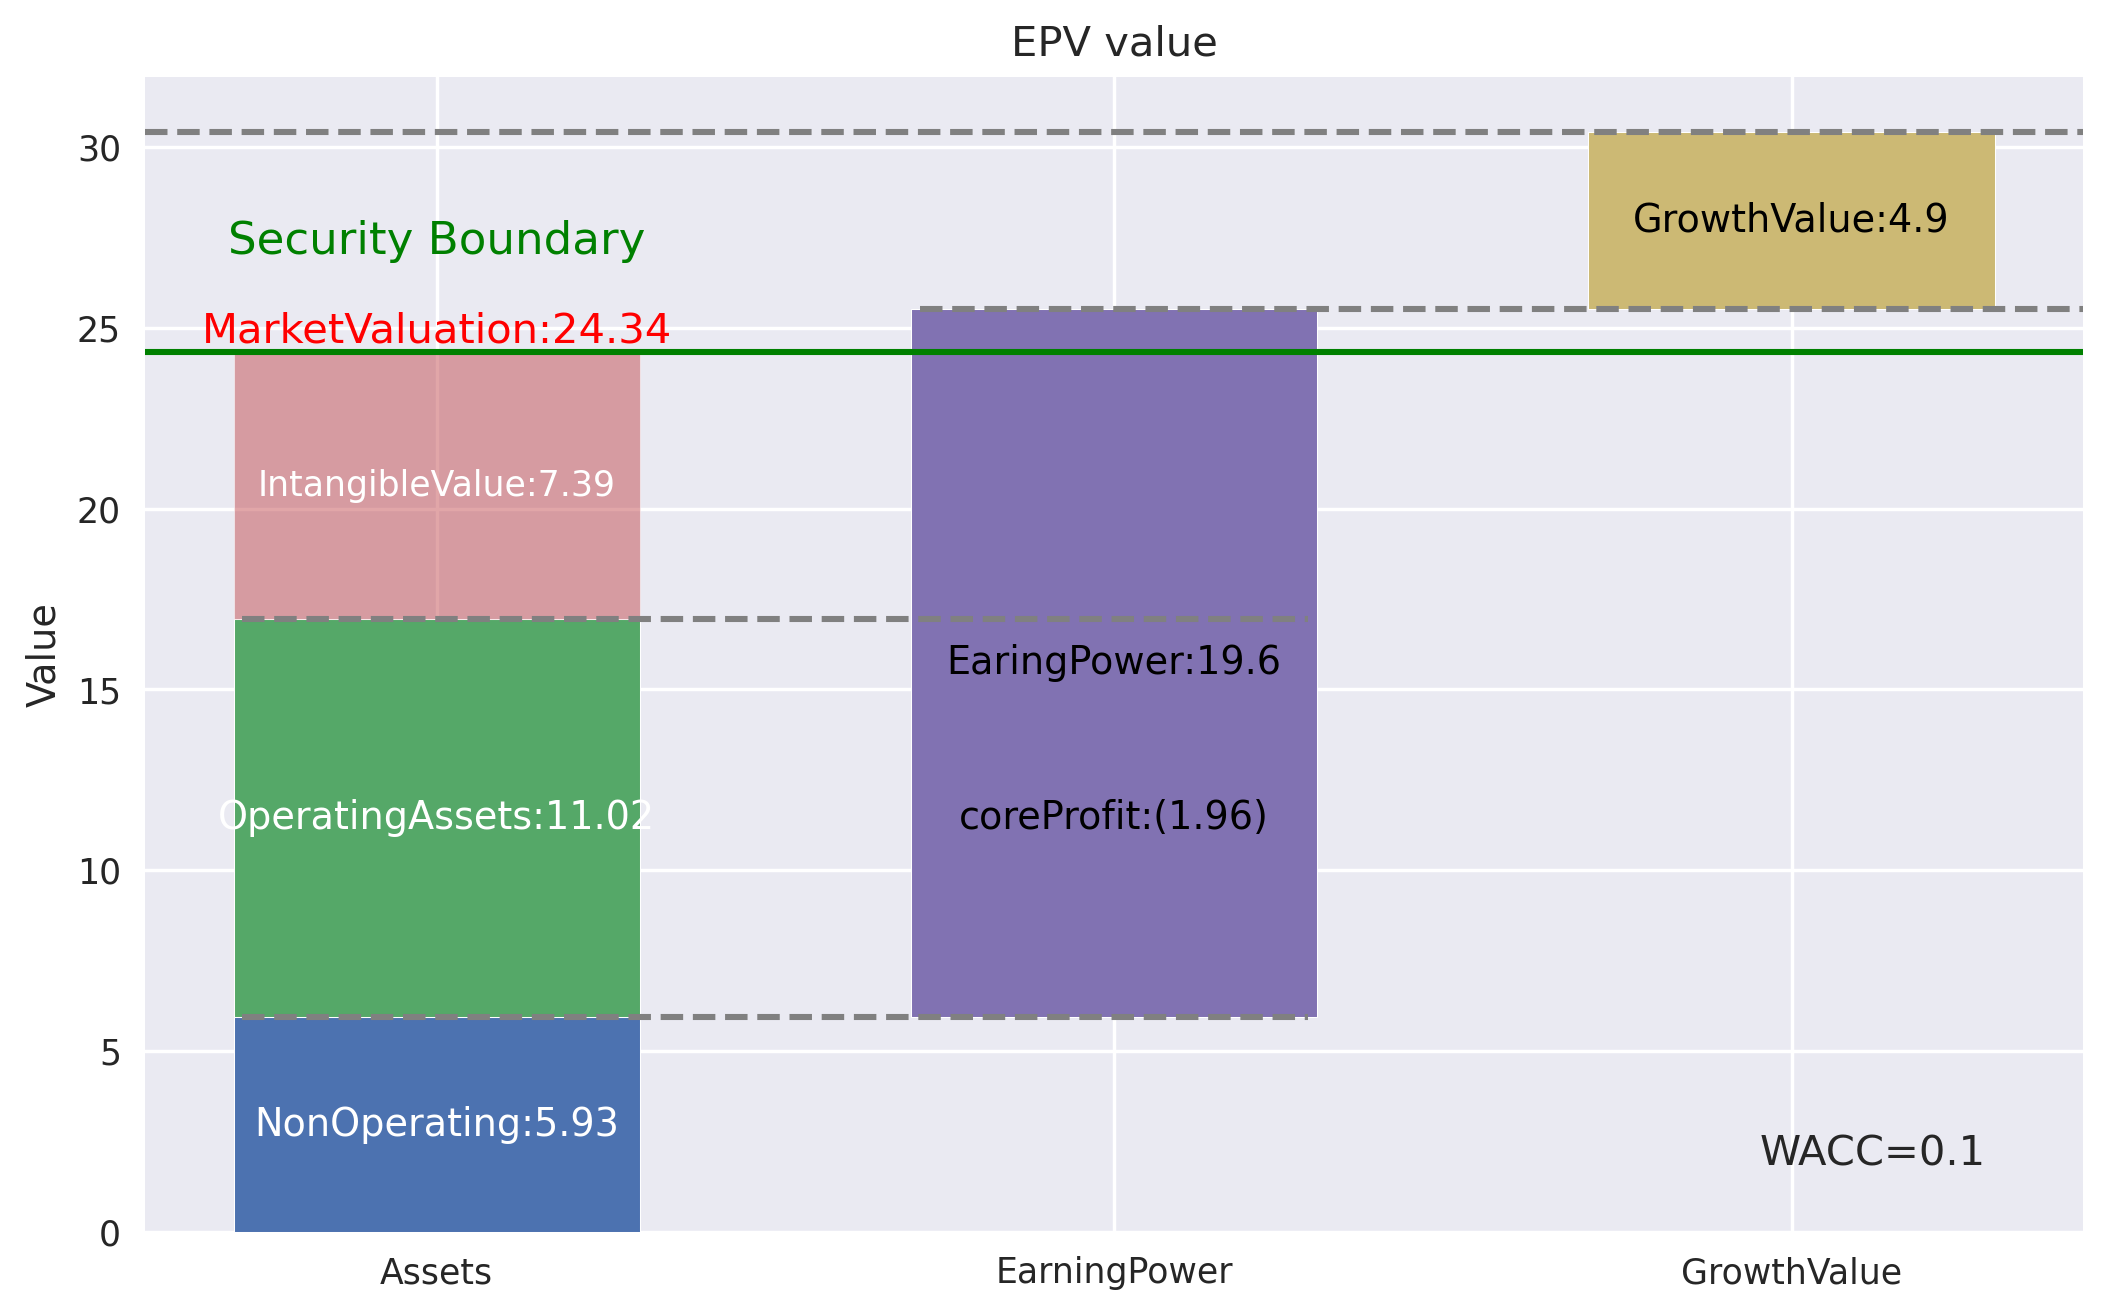

In [29]:
year = '2022'
# 营运资产
OperatingAssets = round(AssetStructure_df.loc[year]['OperatingAssets']/1e9, 2)
# 非营运资产（净值）
NonOperatingAssets = round(AssetStructure_df.loc[year]['NonWorkingCapital']/1e9, 2)
# WACC
WACC = 0.1
# EPV = [coreProfit*(1-taxRate)]/WACC
taxRate = 0.14
coreProfit = round((1-taxRate)*merged_df.loc['2022']['coreIncome']/1e9, 2)
EPV = round(coreProfit/(WACC), 2)
# Growth value
g = 0.02 # 加权折合永续增长率 = 短期增长率与长期增长率的加权等效
Gvalue = round(coreProfit/((WACC-g))-coreProfit/(WACC), 2)
# 安全边际 discount
discount = 0.8

warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib.font_manager')
zhfont = matplotlib.font_manager.FontProperties(fname='/usr/share/fonts/truetype/SimHei.ttf')
plt.rcParams['axes.unicode_minus'] = False


plt.figure(dpi=250, figsize=(10, 6))
width = 0.6
# 创建柱状图
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import seaborn as sns

# 获取调色板
sns.color_palette("rocket")
plt.style.use('seaborn')
# 数据
label1 = ['Assets']
label2 = ['EarningPower']
label3 = ['GrowthValue']

Mvalue = round((NonOperatingAssets+EPV+Gvalue)*discount, 2)
IntangibleValue = round(Mvalue-NonOperatingAssets-OperatingAssets, 2)
# 创建柱状图
bar1 = plt.bar(label1, NonOperatingAssets, label='Non-Operating Assets',width=width)
plt.bar(label1, OperatingAssets, bottom=NonOperatingAssets, label='Operating Assets',width=width)
plt.bar(label1, Mvalue-(NonOperatingAssets+OperatingAssets), bottom=NonOperatingAssets+OperatingAssets, label='Operating Assets',width=width,alpha=0.5)

bar2 = plt.bar(label2, EPV, bottom=NonOperatingAssets, label='Operating Assets',width=width)

plt.bar(label3, Gvalue, bottom=EPV+NonOperatingAssets, label='Operating Assets',width=width)

plt.text(label1[0], NonOperatingAssets/2, 'NonOperating:'+str(NonOperatingAssets), ha='center', va='center', color='white', fontsize=11)
plt.text(label1[0], NonOperatingAssets + (OperatingAssets/2), 'OperatingAssets:'+str(OperatingAssets), ha='center', va='center', color='white', fontsize=11)
plt.text(label1[0], (NonOperatingAssets+OperatingAssets+Mvalue)/2, 'IntangibleValue:'+str(IntangibleValue), ha='center', va='center', color='white', fontsize=10)
plt.text(label2[0], (NonOperatingAssets*2+EPV)/2, 'EaringPower:'+str(EPV), ha='center', va='center', color='black', fontsize=11)
plt.text(label2[0], NonOperatingAssets + (OperatingAssets/2), 'coreProfit:('+str(coreProfit)+')', ha='center', va='center', color='black', fontsize=11)
plt.text(label1[0], (Mvalue+Mvalue/discount)/2, 'Security Boundary', ha='center', va='center', color='green', fontsize=13)
plt.text(label3[0], NonOperatingAssets+EPV + (Gvalue/2), 'GrowthValue:'+str(Gvalue), ha='center', va='center', color='black', fontsize=11)
plt.text(label1[0], Mvalue, 'MarketValuation:'+str(Mvalue), ha='center', va='bottom', color='red', fontsize=12)
plt.axhline(NonOperatingAssets, color='gray', linestyle='dashed', xmin=0.05, xmax=0.6)
plt.axhline(NonOperatingAssets + OperatingAssets, color='gray', linestyle='dashed', xmin=0.05, xmax=0.6)
plt.axhline(NonOperatingAssets + EPV, color='gray', linestyle='dashed', xmin=0.4, xmax=1)
plt.axhline(NonOperatingAssets + EPV + Gvalue, color='gray', linestyle='dashed')
plt.axhline(Mvalue, color='green', linestyle='solid')

plt.text(0.95, 0.05, 'WACC='+str(WACC), horizontalalignment='right', verticalalignment='bottom', transform=plt.gca().transAxes)
# 添加标题和标签
plt.title('EPV value')
plt.ylabel('Value')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 显示图形
plt.savefig(stockName + '估值.png')
plt.show()





## 债务结构
  * 有息负债比例

## 可视化分析

In [24]:
import matplotlib.pyplot as plt

In [25]:
df['REPORT_DATE_NAME']

KeyError: 'REPORT_DATE_NAME'

In [ ]:
import pandas as pd

df = incomeStatement_df

plt.figure(figsize=(18, 6))
# 绘制折线图
plt.plot(df['REPORT_DATE_NAME'], df['GPM'], label='GPM')
plt.plot(df['REPORT_DATE_NAME'], df['coreGPM'], label='coreGPM')

plt.xlabel('REPORT_DATE_NAME')
plt.ylabel('Value')
plt.title('Multiple Line Chart')
plt.legend()

plt.show()

: 